In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import scipy.stats as sp
import seaborn as sns
from scipy.stats.stats import pearsonr
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [160]:
data_er=pd.read_excel("Data_COMP5212project.xlsx",sheet_name="ER",index_col="Date")
print(data_er.head(5))
#data_eurusd=data_er["EUR_USD"]
#data_eurusd=data_er["EUR_USD"]
#print(data_eurusd[:5])
#print(data_er.index[0])

            USD_CNY  USD_JPY  EUR_USD  USD_CAD  AUD_USD  USD_CHF  GBP_USD
Date                                                                     
1999-01-01   8.2778   116.32   1.1366   1.5105   0.6305   1.4160   1.6458
1999-02-01   8.2790   119.17   1.1025   1.5080   0.6188   1.4463   1.6030
1999-03-01   8.2800   118.86   1.0770   1.5080   0.6347   1.4825   1.6107
1999-04-01   8.2790   119.49   1.0570   1.4565   0.6615   1.5255   1.6095
1999-05-01   8.2784   121.52   1.0423   1.4739   0.6488   1.5272   1.6030


In [161]:
data_v=pd.read_excel("Data_COMP5212project.xlsx",sheet_name="Variables", index_col="Date")
print(data_v.head(5))
#print(data_v.index[0])
#print(data_v["EuroStoxx50"])

            Shanghai    SP500  Nikkei225  ...  LTINT_AUS  LTINT_CHE  LTINT_GBR
Date                                      ...                                 
1999-01-01   1134.67  1279.64   14499.25  ...   5.127895      2.555     4.2868
1999-02-01   1090.09  1238.33   14367.54  ...   5.300000      2.550     4.4319
1999-03-01   1158.05  1286.37   15836.59  ...   5.526522      2.604     4.6554
1999-04-01   1120.93  1335.18   16701.53  ...   5.357500      2.534     4.5920
1999-05-01   1279.33  1301.84   16111.65  ...   5.875714      2.720     4.9068

[5 rows x 34 columns]


In [162]:
df_all=data_er.join(data_v)

In [163]:
df_all.tail()


,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01,6.6927,104.64,1.1647,1.3317,0.7026,0.9167,1.2941,3224.53,3269.96,22977.13,2958.21,15580.64,5927.6,9587.15,5577.27,1892.4,37.46,111.40,109.8605,101.8,105.92,108.6384,NaN,100.5908,109.2,2.9,0.12,-0.055,-0.5091,0.245218,0.07,-0.7666,0.05,NaN,0.79,0.040,0.0005,0.602857,0.82,-0.518,0.3058
2020-11-01,6.5789,104.27,1.1928,1.3000,0.7345,0.9090,1.3321,3391.76,3621.63,26433.62,3492.54,17190.25,6517.8,10476.43,6266.19,1784.8,47.59,110.70,109.7934,101.3,105.63,108.7964,NaN,100.3412,109.1,2.9,0.16,-0.055,-0.5209,0.237422,0.02,-0.7840,0.04,NaN,0.87,0.030,-0.0553,0.688500,0.87,-0.509,0.3836
2020-12-01,6.5250,103.24,1.2213,1.2730,0.7694,0.8851,1.3673,3473.07,3756.07,27444.17,3552.64,17433.36,6587.1,10703.51,6460.52,1899.6,51.80,111.50,109.8968,101.1,105.97,108.5594,NaN,100.2407,109.4,2.9,0.17,-0.055,-0.5381,0.235101,0.02,-0.7638,0.03,NaN,0.93,0.020,-0.0915,0.730952,0.98,-0.525,0.3224
2021-01-01,6.4250,104.68,1.2136,1.2777,0.7642,0.8903,1.3702,3483.07,3714.24,27663.39,3481.44,17337.02,6607.4,10591.06,6407.46,1850.3,55.88,112.55,110.3642,101.6,106.27,109.1915,NaN,100.2961,109.3,2.9,0.14,-0.055,-0.5472,0.197896,0.01,-0.7600,0.03,NaN,1.08,0.055,-0.0636,0.805500,1.05,-0.450,0.3672
2021-02-01,6.4730,106.58,1.2074,1.2739,0.7705,0.9082,1.3932,3509.08,3811.15,28966.01,3636.44,18060.26,6673.3,10522.22,6483.43,1728.8,66.13,NaN,NaN,NaN,NaN,NaN,NaN,100.4610,NaN,NaN,0.11,NaN,-0.5417,0.178039,0.01,-0.7500,0.05,NaN,1.26,0.150,0.0668,1.099474,1.32,-0.230,NaN


In [164]:
results = smf.ols('EUR_USD ~  SP500.diff(1) + EuroStoxx50.diff(1) + GoldPrice.diff(1) + BrentOilFutures.diff(1) + CPI_USA.diff(1) + CPI_EU.diff(1) + STINT_USA + STINT_EA19 + LTINT_USA + LTINT_EA19', data=df_all).fit()

In [165]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                EUR_USD   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     41.09
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           5.80e-43
Time:                        16:41:09   Log-Likelihood:                 259.27
No. Observations:                 208   AIC:                            -496.5
Df Residuals:                     197   BIC:                            -459.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

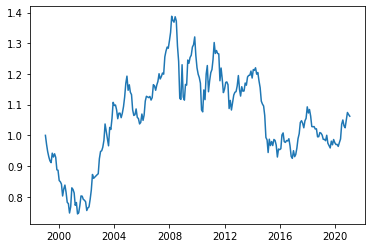

In [166]:
plt.plot(df_all["EUR_USD"]/df_all["EUR_USD"][0])
#plt.plot(df_all["SP500"]/df_all["SP500"][0])
#plt.plot(df_all["EuroStoxx50"]/df_all["EuroStoxx50"][0])
#plt.plot(df_all["BrentOilFutures"]/df_all["BrentOilFutures"][0])
#plt.plot(df_all["CPI_USA"]/df_all["CPI_USA"][0])
#plt.plot(df_all["GoldPrice"]/df_all["GoldPrice"][0])

In [167]:
results = smf.ols('EUR_USD ~  SP500 + EuroStoxx50 + GoldPrice + BrentOilFutures + CPI_USA + CPI_EU + STINT_USA + STINT_EA19 + LTINT_USA + LTINT_EA19', data=df_all).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                EUR_USD   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     93.66
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           1.80e-69
Time:                        16:41:09   Log-Likelihood:                 325.41
No. Observations:                 209   AIC:                            -628.8
Df Residuals:                     198   BIC:                            -592.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2019      0.194     

In [168]:
df_usdeu=df_all[['EUR_USD', 'SP500', 'EuroStoxx50','GoldPrice', 'BrentOilFutures', 'CPI_USA', 'CPI_EU', 'STINT_USA', 'STINT_EA19', 'LTINT_USA', 'LTINT_EA19']]
df_usdeu.tail()

,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19
Date,,,,,,,,,,,
2020-10-01,1.1647,3269.96,2958.21,1892.4,37.46,109.8605,105.92,0.12,-0.5091,0.79,0.0005
2020-11-01,1.1928,3621.63,3492.54,1784.8,47.59,109.7934,105.63,0.16,-0.5209,0.87,-0.0553
2020-12-01,1.2213,3756.07,3552.64,1899.6,51.80,109.8968,105.97,0.17,-0.5381,0.93,-0.0915
2021-01-01,1.2136,3714.24,3481.44,1850.3,55.88,110.3642,106.27,0.14,-0.5472,1.08,-0.0636
2021-02-01,1.2074,3811.15,3636.44,1728.8,66.13,NaN,NaN,0.11,-0.5417,1.26,0.0668


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


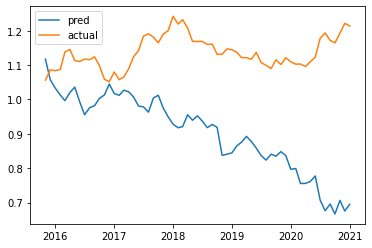

In [169]:
df_usdeu.dropna(inplace=True)
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis=1)
usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = 0.3, shuffle=False )

#print(len(usdeu_x_train))
#print(len(usdeu_x_test))
#print(len(usdeu_y_train))
#print(len(usdeu_y_test))

#train OLS 
from sklearn.linear_model import LinearRegression

linReg = LinearRegression().fit(usdeu_x_train, usdeu_y_train)
#print(linReg.coef_)
#print(linReg.intercept_)
pred_lin_0 = linReg.predict(usdeu_x_test)

pred_lin_0=pd.Series(pred_lin_0,index=usdeu_y_test.index)
plt.plot(pred_lin_0)
plt.plot(usdeu_y_test)
plt.legend(["pred","actual"])
plt.show()

209
146
63


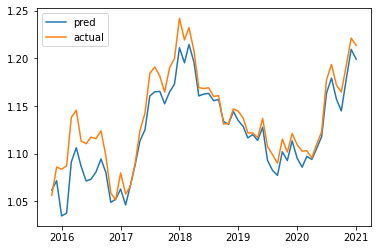

MAE: 0.015524649001748238
MSE: 0.0003960398869198849
RMSE: 0.019900750913467685
R-squared:  0.8162229991397864
Accuracy: 98.64 %.


In [174]:
#one-step ahead predictions for recursive linear regression

df_len=len(df_usdeu)
#print(df_len)
test_size=0.3
start_pred_pos = int(df_len*(1-test_size))
#print(start_pred_pos)
lin_preds_1=[]
for i in range(start_pred_pos, df_len):
  #print(i)
  linReg = LinearRegression().fit(df_usdeu[:i], usdeu_y[1:i+1])
  #print(df_usdeu[:i])
  #print(len(df_usdeu[:i]))
  lin_pred = linReg.predict(df_usdeu[i:i+1])
  #print("+1 ", df_usdeu[i:i+1])
  lin_preds_1.append(lin_pred)
lin_preds_1=pd.Series(lin_preds_1,index=usdeu_y_test.index)
print(len(lin_preds_1))
plt.plot(lin_preds_1)
plt.plot(usdeu_y_test)
plt.legend(["pred","actual"])
plt.show()
errors=lin_preds_1-usdeu_y_test
AE=abs(errors)

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, lin_preds_1))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, lin_preds_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, lin_preds_1)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, lin_preds_1)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (AE / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', np.round(accuracy, 2)[0], '%.')

In [184]:
  linReg = LinearRegression().fit(df_usdeu[0:208], usdeu_y[1:209])
  #print(df_usdeu[:i])
  #print(len(df_usdeu[:i]))
  lin_pred = linReg.predict(df_usdeu[208:209])
  print("predict ER on 2021-02-01:", lin_pred)
  print(df_all[-1:]["EUR_USD"])


predict ER on 2021-02-01: [1.19926707]
Date
2021-02-01    1.2074
Name: EUR_USD, dtype: float64
